In [6]:
# Listing 3-1
import os
import sys

try:
    # Construct the target directory path
    target_dir = os.path.join(os.path.expanduser("~"), "documents", "FaisalNotebooks", "book", "ch03")
    
    # Check if the directory exists
    if not os.path.exists(target_dir):
        # Create the directory if it does not exist
        os.makedirs(target_dir)
        print(f"Created directory: {target_dir}")
        
    # Change the current working directory
    os.chdir(target_dir)
    
    # Print the current working directory to confirm the change
    print(f"Successfully changed the working directory to: {os.getcwd()}")
except FileNotFoundError:
    print(f"Error: The directory '{target_dir}' does not exist.")
except PermissionError:
    print(f"Error: Permission denied to change to the directory '{target_dir}'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    sys.exit(1)

Created directory: C:\Users\agsun\documents\FaisalNotebooks\book\ch03
Successfully changed the working directory to: C:\Users\agsun\documents\FaisalNotebooks\book\ch03


In [9]:
# Listing 3-3
import urllib.request
import os

avURL = "http://datadrivensecurity.info/book/ch03/data/reputation.data"

# Relative path for the downloaded data
avRep = "data/reputation.data"
avRepDir = os.path.dirname(avRep)

# Create the directory if it does not exist
if not os.path.exists(avRepDir):
    os.makedirs(avRepDir)

# Using an if-wrapped test with urllib.request.urlretrieve() vs direct read
# via pandas avoids having to re-download a 16MB file every time we
# run the script
if not os.path.isfile(avRep):
    urllib.request.urlretrieve(avURL, filename=avRep)
    print(f"File downloaded and saved to {avRep}")
else:
    print(f"File already exists at {avRep}")

File downloaded and saved to data/reputation.data


In [10]:
# Listing 3-5
import pandas as pd
# read in the data into a pandas data frame
av = pd.read_csv(avRep, sep="#", header=None)

# make smarter column names
av.columns = ["IP","Reliability","Risk","Type","Country",
              "Locale","Coords","x"]
print(av) 

av.head().to_csv(sys.stdout)

                     IP  Reliability  Risk           Type Country  Locale  \
0        222.76.212.189            4     2  Scanning Host      CN  Xiamen   
1        222.76.212.185            4     2  Scanning Host      CN  Xiamen   
2        222.76.212.186            4     2  Scanning Host      CN  Xiamen   
3           5.34.246.67            6     3       Spamming      US     NaN   
4         178.94.97.176            4     5  Scanning Host      UA  Merefa   
...                 ...          ...   ...            ...     ...     ...   
258621  179.244.194.219            4     2       Spamming      BR     NaN   
258622   216.99.159.166            4     2  Scanning Host      US  Walnut   
258623   216.99.159.169            3     2  Scanning Host      US  Walnut   
258624   216.99.159.176            3     2  Scanning Host      US  Walnut   
258625   216.99.159.117            3     3  Scanning Host      US  Walnut   

                              Coords   x  
0         24.4797992706,118.0819

In [11]:
# Listing 3-6
# require object: av (3-5)
# See corresponding output in Figure 3-1
# import the capability to display Python objects as formatted HTML
from IPython.display import HTML 
# display the first 10 lines of the dataframe as formatted HTML
HTML(av.head(10).to_html())

,IP,Reliability,Risk,Type,Country,Locale,Coords,x
0,222.76.212.189,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
1,222.76.212.185,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
2,222.76.212.186,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
3,5.34.246.67,6,3,Spamming,US,NaN,"38.0,-97.0",12
4,178.94.97.176,4,5,Scanning Host,UA,Merefa,"49.8230018616,36.0507011414",11
5,66.2.49.232,4,2,Scanning Host,US,Union City,"37.5962982178,-122.065696716",11
6,222.76.212.173,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
7,222.76.212.172,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
8,222.76.212.171,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
9,174.142.46.19,6,3,Spamming,NaN,NaN,"24.4797992706,118.08190155",12


In [24]:
# Listing 3-8
# require object: av (3-5)
av['Reliability'].describe()

count    258626.000000
mean          2.798040
std           1.130419
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          10.000000
Name: Reliability, dtype: float64

In [25]:
av['Risk'].describe()

count    258626.000000
mean          2.221362
std           0.531571
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Risk, dtype: float64

In [68]:
# Listing 3-10

def factor_col(col):
    factor = pd.Categorical(col)
    return pd.value_counts(factor,sort=True).reindex(factor.categories)

rel_ct = pd.value_counts(av['Reliability'])
risk_ct = pd.value_counts(av['Risk'])
type_ct = pd.value_counts(av['Type'])
country_ct = pd.value_counts(av['Country'])

In [69]:
print(factor_col(av['Reliability']))

1       5612
2     149117
3      10892
4      87040
5          7
6       4758
7        297
8         21
9        686
10       196
dtype: int64


In [70]:
print(factor_col(av['Risk']))

1        39
2    213852
3     33719
4      9588
5      1328
6        90
7        10
dtype: int64


In [71]:
print(factor_col(av['Type']).head(n=10))

APT;Malware Domain                  1
C&C                               610
C&C;Malware Domain                 31
C&C;Malware IP                     20
C&C;Scanning Host                   7
Malicious Host                   3770
Malicious Host;Malware Domain       4
Malicious Host;Malware IP           2
Malicious Host;Scanning Host      163
Malware Domain                   9274
dtype: int64


In [72]:
print(factor_col(av['Country']).head(n=10))

A1     267
A2       2
AE    1827
AL       4
AM       6
AN       3
AO     256
AR    3046
AT      51
AU     155
dtype: int64


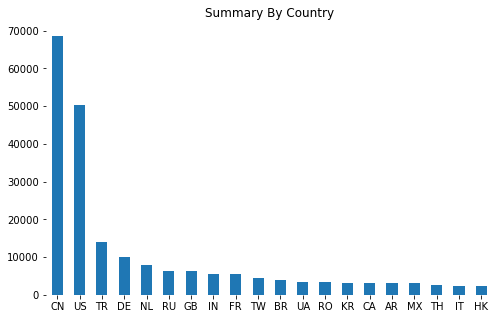

In [73]:
# Listing 3-14
# require object: av (3-5)
# See corresponding output in Figure 3-5
# NOTE: Notice the significant differnce in the Python graph in that the 
#       blank/empty country code entries are not in the graph
# need some functions from matplotlib to help reduce 'chart junk'
import matplotlib.pyplot as plt

# sort by country
country_ct = pd.value_counts(av['Country'])

# plot the data
plt.axes(frameon=0) # reduce chart junk
country_ct[:20].plot(kind='bar', 
   rot=0, title="Summary By Country", figsize=(8,5)).grid(False)

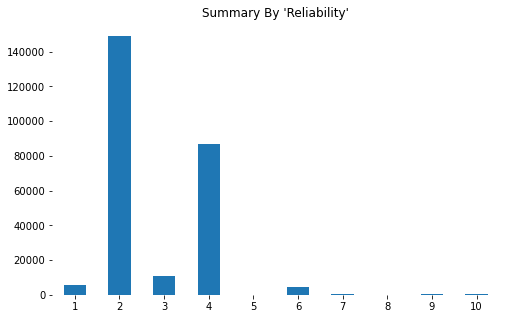

In [74]:
# Listing 3-15
# requires packages: matplotlib
# require object: av (3-5), factor_col (3-10)
# See corresponding output in Figure 3-6
plt.axes(frameon=0) # reduce chart junk
factor_col(av['Reliability']).plot(kind='bar', rot=0,
           title="Summary By 'Reliability'", figsize=(8,5)).grid(False)

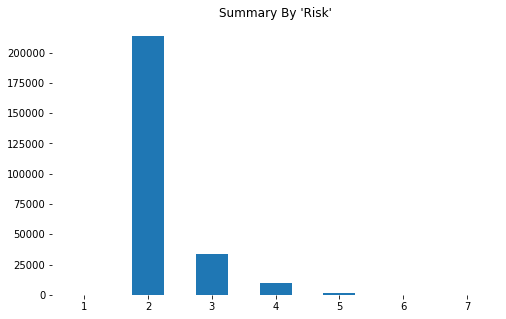

In [75]:
# Listing 3-16
# requires packages: matplotlib
# require object: av (3-5), factor_col (3-10)
# See corresponding output in Figure 3-7
plt.axes(frameon=0) # reduce chart junk
factor_col(av['Risk']).plot(kind='bar', rot=0, 
           title="Summary By 'Risk'", figsize=(8,5)).grid(False)

In [76]:
# Listing 3-18
# require object: av (3-5)
# extract the top 10 most prevalent countries
top10 = pd.value_counts(av['Country'])[0:9] 
# calculate the % for each of the top 10
top10.astype(float) / len(av['Country'])
## CN    0.265182
## US    0.194826
## TR    0.053970
## DE    0.038484
## NL    0.030666
## RU    0.024537
## GB    0.024332
## IN    0.021189
## FR    0.021069
## Length: 9, dtype: float64

CN    0.265182
US    0.194826
TR    0.053970
DE    0.038484
NL    0.030666
RU    0.024537
GB    0.024332
IN    0.021189
FR    0.021069
Name: Country, dtype: float64